In [61]:
# vector geometry manipulation
import geopandas as gpd

# read and write raster data
import rasterio
import rasterio.plot
import rasterio.mask

# query rasters for vaalues
import rasterstats

# n-d matrices
import numpy as np

# geometry creation
import shapely

# plotting
import matplotlib.pyplot as plt

In [2]:
# read DEM
src_srtm = rasterio.open('data/srtm.tif')
# read NP boundary
zion = gpd.read_file('data/zion.gpkg')
# read points of interest
zion_points = gpd.read_file('data/zion_points.gpkg')

In [19]:
# have a look at the data?
src_srtm

In [97]:
zion

,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,geometry
0,ZION,Lands - http://landsnet.nps.gov/tractsnet/docu...,Zion National Park,2017-06-22,UT,IM,1455157,National Park,Lands,https://irma.nps.gov/App/Reference/Profile/218...,Zion,"POLYGON ((-113.08439 37.17130, -113.08599 37.1..."


In [50]:
zion.columns

Index(['UNIT_CODE', 'GIS_Notes', 'UNIT_NAME', 'DATE_EDIT', 'STATE', 'REGION',
       'GNIS_ID', 'UNIT_TYPE', 'CREATED_BY', 'METADATA', 'PARKNAME',
       'geometry'],
      dtype='object')

In [52]:
zion_points

,geometry,height_m
0,POINT (-112.91587 37.20013),1802
1,POINT (-113.09369 37.39263),2433
2,POINT (-113.02462 37.33466),1886
3,POINT (-112.96114 37.24326),1370
4,POINT (-112.98976 37.20847),1452
5,POINT (-112.88066 37.19319),1635
6,POINT (-113.05051 37.24061),1380
7,POINT (-113.09525 37.34965),2032
8,POINT (-113.03619 37.31429),1830
9,POINT (-113.20772 37.43165),1860


(array([ 105., 1663., 3534., 3845., 4442., 5294., 4701., 4826., 4907.,
        5515., 3894., 3805., 3706., 4708., 5963., 5122., 5994., 6272.,
        7623., 8527., 6810., 6515., 6955., 7847., 8373., 8148., 7429.,
        6356., 5564., 4666., 4117., 3737., 3291., 2944., 2850., 3261.,
        4424., 5025., 3705., 2810., 2437., 2293., 1699., 1409., 1349.,
        1215., 1045.,  940.,  614.,  231.]),
 array([1024.  , 1061.36, 1098.72, 1136.08, 1173.44, 1210.8 , 1248.16,
        1285.52, 1322.88, 1360.24, 1397.6 , 1434.96, 1472.32, 1509.68,
        1547.04, 1584.4 , 1621.76, 1659.12, 1696.48, 1733.84, 1771.2 ,
        1808.56, 1845.92, 1883.28, 1920.64, 1958.  , 1995.36, 2032.72,
        2070.08, 2107.44, 2144.8 , 2182.16, 2219.52, 2256.88, 2294.24,
        2331.6 , 2368.96, 2406.32, 2443.68, 2481.04, 2518.4 , 2555.76,
        2593.12, 2630.48, 2667.84, 2705.2 , 2742.56, 2779.92, 2817.28,
        2854.64, 2892.  ]),
 <BarContainer object of 50 artists>)

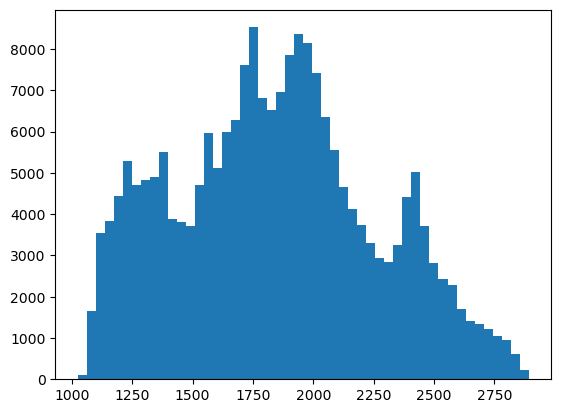

In [51]:
f, ax = plt.subplots()
ax.hist(src_srtm.read(1).ravel(), bins=50)

In [3]:
# transform CRS of vector
zion = zion.to_crs(src_srtm.crs)

<Axes: >

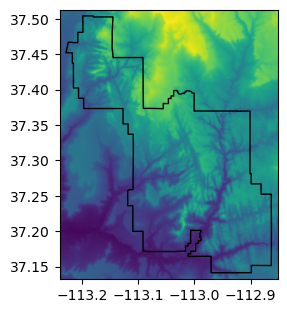

In [9]:
# plot our DEM and boundary data
fig, ax = plt.subplots(figsize=(3.5, 3.5))
rasterio.plot.show(src_srtm, ax=ax)
zion.plot(ax=ax, color='none', edgecolor='black')

<Axes: >

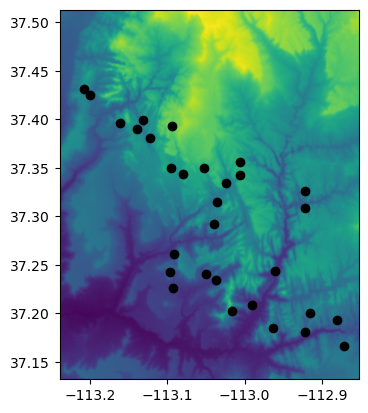

In [46]:
# map the points
fig, ax = plt.subplots()
rasterio.plot.show(src_srtm, ax=ax)
zion_points.plot(ax=ax, color='black')

<Axes: >

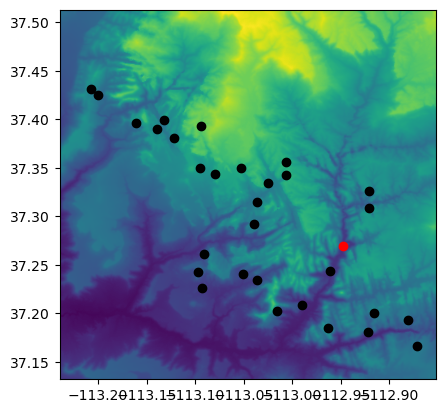

In [48]:
# map the points along with Angels' Landing
fig, ax = plt.subplots()
rasterio.plot.show(src_srtm, ax=ax)
zion_points.plot(ax=ax, color='black')
angels_landing = gpd.GeoDataFrame({"geometry": [shapely.geometry.Point([-112.947854, 37.269803])]})
angels_landing.plot(ax=ax, c="red")

In [37]:
# raster extraction (points)
result1 = rasterstats.point_query(
    zion_points, 
    src_srtm.read(1), 
    nodata = src_srtm.nodata, 
    affine = src_srtm.transform,
    interpolate='nearest'
)

In [40]:
# assign the results to the GeoDataFrame
zion_points["height_m"] = result1

<Axes: ylabel='Frequency'>

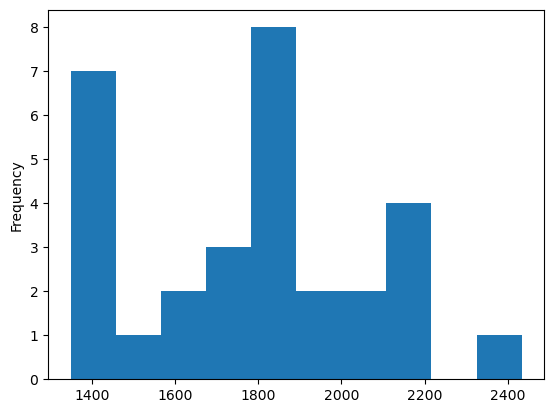

In [42]:
# point height distribution
zion_points.height_m.plot(kind="hist")

In [55]:
# extract a transect
coords = [[-113.2, 37.45], [-112.9, 37.2]]
zion_transect = shapely.LineString(coords)
print(zion_transect)

LINESTRING (-113.2 37.45, -112.9 37.2)


In [59]:
# find regularly spaced intervals along the transect in meters
zion_transect_utm = gpd.GeoSeries(zion_transect, crs=4326).to_crs(32612)
zion_transect_utm = zion_transect_utm.iloc[0]
print(zion_transect_utm)

LINESTRING (305399.67208180577 4147066.650206682, 331380.8917453843 4118750.0947884847)


In [78]:
# get 250m intervals of distance along transect
distances = np.arange(0, zion_transect_utm.length, 250)
distances[:5]

array([   0.,  250.,  500.,  750., 1000.])

In [63]:
zion_transect_pnt = [zion_transect_utm.interpolate(distance) for distance in distances]
zion_transect_pnt = gpd.GeoSeries(zion_transect_pnt, crs=32612).to_crs(src_srtm.crs)
zion_transect_pnt

0      POINT (-113.20000 37.45000)
1      POINT (-113.19804 37.44838)
2      POINT (-113.19608 37.44675)
3      POINT (-113.19413 37.44513)
4      POINT (-113.19217 37.44351)
                  ...             
149    POINT (-112.90918 37.20769)
150    POINT (-112.90724 37.20606)
151    POINT (-112.90529 37.20443)
152    POINT (-112.90334 37.20280)
153    POINT (-112.90140 37.20117)
Length: 154, dtype: geometry

In [81]:
# sample the heights along the transect
result = rasterstats.point_query(
    zion_transect_pnt, 
    src_srtm.read(1), 
    nodata = src_srtm.nodata, 
    affine = src_srtm.transform,
    interpolate='nearest'
)
# save the result to a GeoDataFrame
zion_transect = gpd.GeoDataFrame(geometry=zion_transect_pnt.geometry)
zion_transect['dist'] = distances
zion_transect['elev'] = result
zion_transect

,geometry,dist,elev
0,POINT (-113.20000 37.45000),0.0,2001
1,POINT (-113.19804 37.44838),250.0,2037
2,POINT (-113.19608 37.44675),500.0,1949
3,POINT (-113.19413 37.44513),750.0,1869
4,POINT (-113.19217 37.44351),1000.0,1783
...,...,...,...
149,POINT (-112.90918 37.20769),37250.0,1854
150,POINT (-112.90724 37.20606),37500.0,1897
151,POINT (-112.90529 37.20443),37750.0,1837
152,POINT (-112.90334 37.20280),38000.0,1841


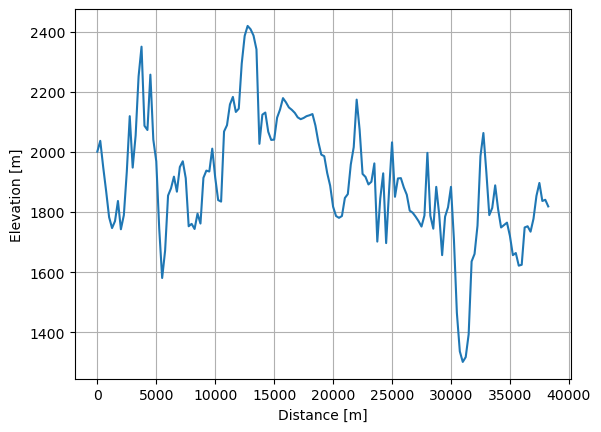

In [94]:
f, ax = plt.subplots()
ax.plot(zion_transect.dist, zion_transect.elev)
ax.set_xlabel("Distance [m]")
ax.set_ylabel("Elevation [m]")
ax.grid()

Text(123.32125636460547, 0.5, 'Latitude')

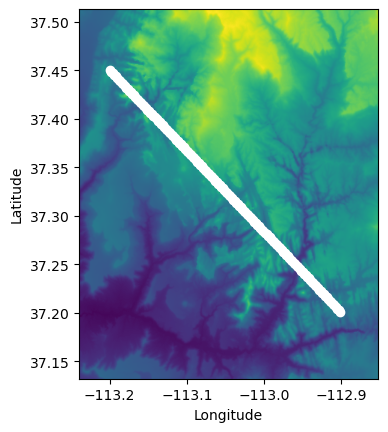

In [92]:
f, ax = plt.subplots()
rasterio.plot.show(src_srtm, ax=ax)
zion_transect.plot(ax=ax, color='white')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

In [98]:
# raster extraction to polygons
result = rasterstats.zonal_stats(
    zion, 
    src_srtm.read(1), 
    nodata = src_srtm.nodata, 
    affine = src_srtm.transform, 
    stats = ['mean', 'min', 'max']
)
result

[{'min': 1122.0, 'max': 2661.0, 'mean': 1818.211830154405}]